findfont: Font family ['MS Reference Specialty'] not found. Falling back to DejaVu Sans.
findfont: Font family ['MS Reference Sans Serif'] not found. Falling back to DejaVu Sans.


Friday's Total Utility: 11.252803339284057
Initial Mass of the Crusonia Plant: 10.0
 Period  Consumption
    1.0     0.100000
    2.0     0.105000
    3.0     0.110250
    4.0     0.115763
    5.0     0.121551
    6.0     0.127628
    7.0     0.134010
    8.0     0.140710
    9.0     0.147746
   10.0     0.155133
   11.0     0.162889
   12.0     0.171034
   13.0     0.179586
   14.0     0.188565
   15.0     0.197993
   16.0     0.207893
   17.0     0.218287
   18.0     0.229202
   19.0     0.240662
   20.0     0.252695
   21.0     0.265330
   22.0     0.278596
   23.0     0.292526
   24.0     0.307152
   25.0     0.322510
   26.0     0.338635
   27.0     0.355567
   28.0     0.373346
   29.0     0.392013
   30.0     0.411614
   31.0     0.432194
   32.0     0.453804
   33.0     0.476494
   34.0     0.500319
   35.0     0.525335
   36.0     0.551602
   37.0     0.579182
   38.0     0.608141
   39.0     0.638548
   40.0     0.670475
   41.0     0.703999
   42.0     0.739199
   43.0     0

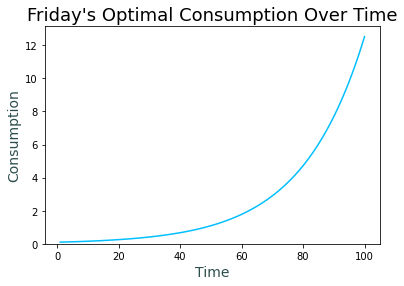

In [1]:
#N-Period Crusonia Model
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

t = int(input("Enter the number of time periods, t:")) 

#Coefficients
c0 = float(input("Enter the initial size of the Crusonia plant, c0:"))  #The Crusonia plant's initial size
ß = float(input("Enter Friday's discount factor, ß, generally it is assumed that 0<ß≤0:"))  #The factor by which Friday discounts the urgency of future demands
π = float(input("Enter the rate at which the Crusonia plant grows, π, if π<1 the Crusonia plant decays over time and if π>1 it grows over time:")) #The rate at which the Crusonia plant grows

#Solving for the Optimal Consumption Path
i, j = np.meshgrid(np.arange(t), np.arange(t))
a = ((1/((ß**j)*(π**j)))*1)*sum([ß**(x-1) for x in range(1, t+1)])
A = np.diag(np.diag(a))
b =  np.full((t, 1), c0)

x = np.linalg.solve(A, b)


#Creating a Vector for Time Periods
k, l = np.meshgrid(np.arange(1), np.arange(t))
time = (l+1)

#Finding the Total Utility:
log = np.log(x) #Friday's utility can be decomposed across each period and it is described by the natural logarithm of his consumption that period
m, n = np.meshgrid(np.arange(t), np.arange(t))
z = ((((ß**(k))*1**n))) #
discount = np.diag(np.diag(z))
c = np.multiply(log, discount)
util = np.sum(c)
print("Friday's Total Utility:", util)
print('Initial Mass of the Crusonia Plant:', c0)

nperioddf = pd.DataFrame(data=np.column_stack((time,x)),columns=['Period','Consumption'])
print(nperioddf.to_string(index=False))

plt.plot(time, x, color = 'deepskyblue')

font1 = {'family':'MS Reference Sans Serif', 'color':'darkslategray','size':14}
font2 = {'family':'MS Reference Specialty', 'color':'black','size':18}
plt.ylim(ymin=0) 

plt.xlabel("Time", fontdict = font1)
plt.ylabel("Consumption", fontdict = font1)
plt.title("Friday's Optimal Consumption Over Time", fontdict = font2)

plt.show()